# IEooc Methods_3 Software_002 - Sample solution

## Scenarios for the transformation of the vehicle fleet in Freiburg (ctd.)

In Freiburg, there were about 95000 passenger vehicles in 2022, which is about 400 vehicles per 1000 inhabitants (with a population of about 236000 people)
https://www.freiburg.de/pb/1649864.html 

These emitted at total of about 300000 tons of CO2 in 2022.
Source: Hertle and Gugel (2022). CO2-Bilanz Energie und Verkehr für die Stadt Freiburg bis 2020, ifeu Heidelberg.
https://www.freiburg.de/pb/site/Freiburg/get/params_E548774210/2059583/Bericht_Klimabilanz_Freiburg_2019_2020.pdf 
(Total traffic emissions were at about 450000 tons, most of which (ca. 2/3) come from passenger vehicles.)

From the city's ambition to become 'climate neutral' by 2035 follows that the vehicle fleet must be transformed to low carbon alternatives. The purpose of this software is to model such a fleet transformation and estimate the potential impact of different emissions reduction strategies, such as vehicle fuel efficiency, a fuel shift to electric vehicles, and the use of a low carbon electricity mix.

**This calculation exercise covers additional calculations on the the service provided, the stock, energy flow, and enery supply steps of the energy service cascade for passenger vehicles in Freiburg.
It is a direct follow-up to Software workbook IEooc Methods_3 Software_001.**

The data workbook *IEooc_Methods3_Software001_Data.xlsx* contains a number of parameters for the calculation.

The core of the fleet model is a description of the future vehicle fleet (or stock) *S* by year *t* and age-cohort (or year of registration) *c*: *S(t,c)*. For the purpose of this exercise, the age-cohort structure of the stock and its total future size is given as input data. The stock grows from about 95000 vehicles in 2022 to about 108000 in 2035, about 113000 in 2050, and about 11600 in 2060. This increase reflects the expected future population growth.

**Using the material from IEooc_Methods3_Software001 (data and code), calculate and interpret the following indicators/quantities:**

### Task 1: For the given scenario, in the year 2035 (target for climate neutrality): How many percent of the vehicle fleet in 2035 are already on the road today (from age-cohorts of 2023 and earlier)?
Calculate the relevant indicators using the Python code below and interpret your results!

In [1]:
# First, import required libraries:
import pandas as pd   # dataframe library, used for fast import/export from/to excel and for organizing the data.
import numpy as np    # math library
import matplotlib.pyplot as plt  # plotting library

In [2]:
# read input data from excel into dataframe and convert to numpy array
df_fleet = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Fleet', index_col=0)
fleet = df_fleet.values
print(df_fleet.shape) # rows: 41 years 2020...2060, columns: 59 age-cohorts 2002...2060

(41, 59)


In [3]:
# slice the fleet array:
# First, the total fleet size in 2035:
fleet_2035_all = fleet[15,:].sum() # starting with index 0 for 2020, 2035 has index 15.
print(fleet_2035_all)
# Then, the fleet size for age-cohorts up to 2023:
fleet_2035_23 = fleet[15,0:22].sum() # starting with 0 for 2002, 2023 has index 21, and since Python counts only to the second-to-last index, we need to enter index 22 here.
print(fleet_2035_23)
# Finally, the ratio of the two, in %:
fleet_share_35_23 = 100 * fleet_2035_23 / fleet_2035_all
print(fleet_share_35_23)

107621
37368
34.72184796647495


Almost 35%, or roughly one third, of all vehicles in the 2035 fleet in Freiburg are already on the road today. That is quite a large share, given that most of them are gasoline or diesel vehicles, which will not contribute to climate neutrality in 2035 unless fuelled with costly synthetic liquid fuels.

### Task 2: How large is the service flow (in passenger-km/yr) provided by the vehicle fleet?
Calculate and plot the result!

The total kilometrage provided by the fleet, *KM(t)*, is given by the following equation:

$$ KM(t) = \sum_c km(t) \cdot S(t,c) $$

Below, we first read the data for *km(t)* and then do the calculation with the np.einsum function.

In [4]:
df_km = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Kilometrage', index_col=0)
df_km # print data
km_t = df_km.values.squeeze() # convert to numpy array and collapse additional dimension of length 1

In [5]:
KM_t = np.einsum('tc,t->t',fleet,km_t)

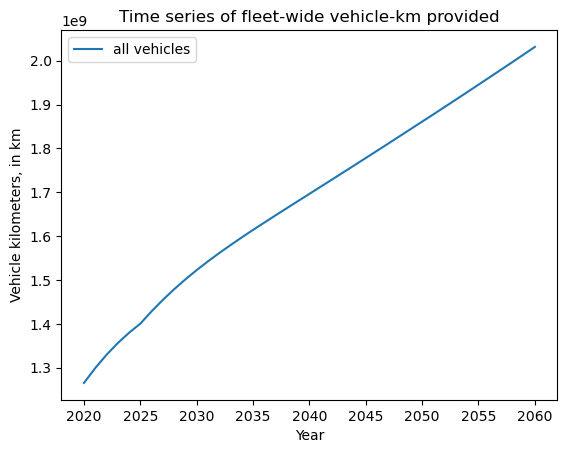

In [6]:
plt.plot(np.arange(2020,2061,1),KM_t) # plot with given x-axis values, generated with the np.arange command
plt.title('Time series of fleet-wide vehicle-km provided')
plt.ylabel('Vehicle kilometers, in km')
plt.xlabel('Year')
plt.legend(['all vehicles'])
plt.savefig('Fleet_km_t.png', dpi = 300) # save figure with the modifications made above.

For the given scenario, the fleet-wide km are increasing over time, both because the vehicle fleet grows and because the km per vehicle and year grow in the given scenario data.

### Task 3: In 2040, how many % of the passenger-km/yr are provided by vehicles that are 10 years old or older?

Calculate and interpret the result!


Here, we calculate the total kilometrage provided by the fleet, *KM(t,c)*, broken down by age-cohort *c*, which is given by the following equation:

$$ KM(t,c) = km(t) \cdot S(t,c) $$

Below, we do the calculation with the np.einsum function.

In [7]:
KM_t_c = np.einsum('tc,t->tc',fleet,km_t)

Now, we slice the km by year *t* and age-cohort *c* to first get all km in 2040 and then only those by age-cohorts from 2002 up to and including 2030:

In [8]:
km_2040_all = KM_t_c[20,:].sum() # index 0 for 2020, index 20 for 2040
print(km_2040_all)
km_2040_10plus = KM_t_c[20,0:29].sum() # index 0 for 2002, index 28 for 2030, plus one because Python stops at second-to-last element in the list of age-cohorts.
print(km_2040_10plus)
km_share_10plus = 100 * km_2040_10plus / km_2040_all
print(km_share_10plus)

1696490500
746278500
43.989547834190645


According to the given scenario, in Freiburg, in 2040, about 44% of all vehicle-km are delivered by vehicles that were registered in 2030 or before. The other 56% are delivered by vehicles registered between 2031 and 2040.

### Task 4: Calculate and plot the share (%) of GHG emissions that are associated with electric vehicles (scope 2) in the total GHG from the Freiburg vehicle fleet! 

Calculate and plot the result!

We calculate the GHG emissions by drive technology exactly as in the first software exercise (not summing up over the drive technology *T*) and then determine the share by dividing the BEV GHG emissions by the total GHG emissions of the fleet:

With the split parameter on sheet BEV_share in the data sheet, we have an age-cohort specific breakdown *SHARE(c,T)* of the vehicle fleet into different drive technologies.
From this breakdown, we can compute the total energy consumption as follows, with the second dimension of the fuel intensity *MJ* as technology *T*:

$$ GHG(t,T) = \sum_{c} GHG(t,T) \cdot SHARE(c,T) \cdot MJ(c,T) \cdot km(t) \cdot S(t,c) $$

In [9]:
df_MJ = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Fuel_Consumption', index_col=0)
MJ_c  = df_MJ.values

df_Share = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='BEV_share', index_col=0)
SHARE_T = df_Share.values/100 # covert from % to 1.
SHARE_T.shape

df_GHG = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='GHG_intensity', index_col=0)
GHG_energy_t = df_GHG.values
GHG_energy_t.shape

(41, 2)

In [10]:
GHG_t_T = np.einsum('tc,cT,cT,tT,t->tT',fleet,MJ_c,SHARE_T,GHG_energy_t,km_t)/1e6 # take full array MJ_c with c and T dimensions

GHG_BEV = GHG_t_T[:,1] # index 1 for BEV
GHG_All = GHG_t_T.sum(axis = 1) # sum up over all column (axis = 1)

GHG_Share_BEV = 100 * GHG_BEV / GHG_All
print(GHG_Share_BEV)

[ 0.15857005  0.253263    0.36549305  0.59291864  0.92520127  1.35135996
  1.86617747  2.46659442  3.15095386  3.91911841  4.7724194   5.71287984
  6.74458567  7.87308879  9.10526898 10.4491589  11.91799457 13.52533031
 15.29002054 17.23593423 19.4236027  21.89797488 24.50180567 27.2464057
 30.13443939 33.16620876 36.34288979 39.65461766 43.09474648 46.65442733
 50.31013177 54.03857573 57.80965679 61.58568344 65.33336022 68.99838468
 72.55044038 75.94760878 79.14892472 82.11870186 84.84202963]


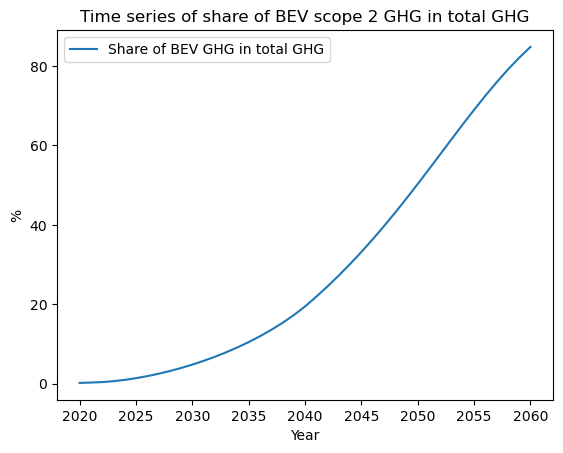

In [11]:
plt.plot(np.arange(2020,2061,1),GHG_Share_BEV) # plot with given x-axis values, generated with the np.arange command
plt.title('Time series of share of BEV scope 2 GHG in total GHG')
plt.ylabel('%')
plt.xlabel('Year')
plt.legend(['Share of BEV GHG in total GHG'])
plt.savefig('BEV_GHG_Share.png', dpi = 300) # save figure with the modifications made above.

Over the next decades, in this scenario, the share of battery electric vehicle scope 2 GHG will increase from today's almost 0% to more than 80% in 2060, since most of the future vehicles in the fleet will be BEVs. At the same time, total GHG will decline drastically, which cannot be seen in this plot. Overall, the gasoline vehicle-related GHG will decline to very low values as these vehicles are being phased out almost completely.

### Task 5: For the given scenario, in the year 2035 (target for climate neutrality): How many percent of the fleet-wide GHG in 2035 are caused by vehicles that are already on the road today (from age-cohorts of 2023 and earlier)?

Calculate and interpret the result!

Here, we calculate the GHG emissions by age-cohort, and not by technology, and select the emissions from the pre 2024 age-cohorts:

$$ GHG(t,c) = \sum_{T} GHG(t,T) \cdot SHARE(c,T) \cdot MJ(c,T) \cdot km(t) \cdot S(t,c) $$

In [12]:
GHG_t_c = np.einsum('tc,cT,cT,tT,t->tc',fleet,MJ_c,SHARE_T,GHG_energy_t,km_t)/1e6 # take full array MJ_c with c and T dimensions

GHG_35_all = GHG_t_c[15,:].sum() # index 15 for 2035, all age-cohorts
print(GHG_35_all)
GHG_35_old = GHG_t_c[15,0:22].sum() # index 15 for 2035, all age-cohorts
print(GHG_35_old)

GHG_Share_35 = 100 * GHG_35_old / GHG_35_all
print(GHG_Share_35)

264514.38561035716
117845.409855
44.551607120753026


For this scenario, the share of GHG from vehicles registered pre 2024 in the fleet modelled for 2035 is about 45%. This shows the magnitude of the future GHG emissions that are determined by historic vehicle purchase decisions. Even though the fleet continues to increase, future vehicles will be more and more electric, with declining scope 2 emissions, increasing the GHG share of the historic (pre 2024) age-cohorts even more.

This can also be seen by comparing the results of Task 1 of this exercise with the result of Task 5:
In the modelled scenario, in 2035, about 35% of the vehicle on the road are already driving today (registered by the end of 2023), and the share of GHG emissions of these vehicles in the GHG emissions of the entire fleet will be about 45%. 
With this observation, we conclude this exercise.